In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [6]:
# Create a DataFrame with the scaled data
scaler = StandardScaler()

# Copy the crypto names from the original data
scaled_data = scaler.fit_transform(df_market_data)

# Set the coinid column as index

df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:

# 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using `df_market_data_scaled`
        kmeans.fit(df_scaled)

# 3. Append the model.inertia_ to the inertia list
        inertia_values.append(kmeans.inertia_)
# Display the inertia values
print(inertia_values)

C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 65.302379141625, 52.888518219775314, 43.91469044757747, 37.517032490103574, 32.485240832183536, 28.22289929060893, 24.545512769147678]


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   52.888518
6    7   43.914690
7    8   37.517032
8    9   32.485241
9   10   28.222899
10  11   24.545513


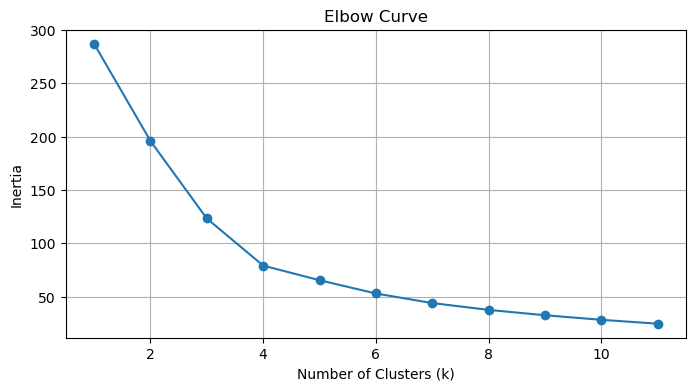

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with inertia values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k would be 4 as this is where it slows down most rapidly.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Define the best value for k
best_k = 4  

# Initialize the K-Means model with the best 'k'
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [16]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()


In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['cluster'] = cluster_labels  # Assuming 'cluster_labels' contains the cluster assignments


# Display sample data
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas
import holoviews as hv

# Create a DataFrame with cryptocurrency names, 24h price change, 7d price change, and cluster labels
crypto_data = df_copy[['price_change_percentage_24h', 'price_change_percentage_7d', 'cluster']]
crypto_data['crypto_name'] = df_copy.index

# Create the scatter plot using hvPlot
scatter_plot = crypto_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    cmap='viridis',  # You can choose another colormap
    size=8,
    hover_cols=["crypto_name"]
)

# Customize the plot appearance
scatter_plot.opts(
    title="Cryptocurrency Clusters",
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage",
    width=800,
    height=400
)


C:\Users\derek\AppData\Local\Temp\ipykernel_10552\2275636315.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data['crypto_name'] = df_copy.index


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,crypto_name)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:

from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with `fit_transform` to reduce to three principal components
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame from the PCA result
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.index)

# View the first five rows of the DataFrame
print(df_pca.head())


                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Retrieve the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PCA{i+1}: {ev:.4f}")


Explained Variance for PCA1: 0.3720
Explained Variance for PCA2: 0.3470
Explained Variance for PCA3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance for the Three Principal Components: 0.8950.



In [22]:
# Create a new DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.index)

# Copy the crypto names from the original data
df_pca_data['crypto_name'] = df_scaled.index

# Set the 'coin_id' column as the index
df_pca_data.set_index('crypto_name', inplace=True)

# Display sample data
print(df_pca_data.head())


                  PCA1      PCA2      PCA3
crypto_name                               
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [24]:
# Import the necessary libraries
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `df_pca_data`
    kmeans_pca.fit(df_pca_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Display the inertia values
print(inertia_values_pca)


C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[256.87408556789256, 165.90199402036012, 93.77462568057294, 49.665496651797355, 37.87874703346249, 27.61897178795743, 21.182775862957325, 17.38982320476889, 13.593650379876728, 10.559357562793432, 8.007418066730592]


In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k': k_values,
    'inertia_pca': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print(elbow_df_pca)



     k  inertia_pca
0    1   256.874086
1    2   165.901994
2    3    93.774626
3    4    49.665497
4    5    37.878747
5    6    27.618972
6    7    21.182776
7    8    17.389823
8    9    13.593650
9   10    10.559358
10  11     8.007418


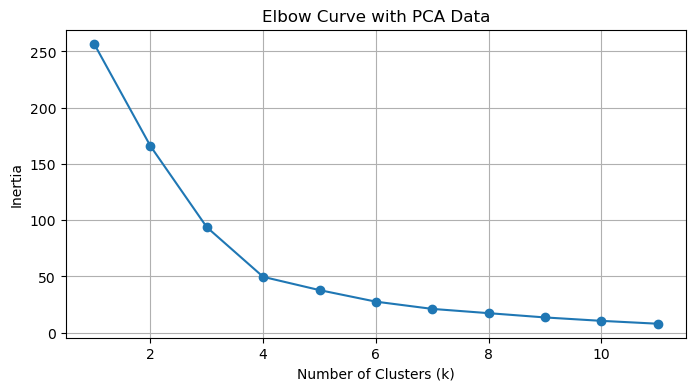

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Create a line chart to visualize the inertia values
plt.figure(figsize=(8, 4))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia_pca'], marker='o')
plt.title('Elbow Curve with PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is still 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It did nto differ from the orginal data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k
# Define the best value for 'k' determined from the Elbow Curve analysis with PCA data
best_k_pca = 4

# Initialize the K-Means model with the best 'k' value
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [30]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca_data)

# Get the cluster labels for each data point
cluster_labels_pca = kmeans_pca.labels_

C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# Predict the clusters for the PCA-transformed data
cluster_labels_pca = kmeans_pca.predict(df_pca_data)

# Print the resulting array of cluster values
print(cluster_labels_pca)



[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [32]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column with the predicted clusters to the DataFrame
df_pca_copy['cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy.head())



                  PCA1      PCA2      PCA3  cluster
crypto_name                                        
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        3
ripple       -0.471835 -0.222660 -0.479053        3
bitcoin-cash -1.157800  2.041209  1.859715        0


In [33]:
import hvplot.pandas

# Create a DataFrame with cryptocurrency names, PCA components (PC1 and PC2), and cluster labels
pca_plot_data = df_pca_copy[['PCA1', 'PCA2', 'cluster']]
pca_plot_data['crypto_name'] = df_pca_copy.index

# Create the scatter plot using hvPlot
scatter_plot = pca_plot_data.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="cluster",
    cmap='viridis',  # You can choose another colormap
    size=8,
    hover_cols=["crypto_name"]
)

# Customize the plot appearance
scatter_plot.opts(
    title="Cryptocurrency Clusters with PCA Data",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    width=800,
    height=400
)


:Scatter   [PCA1]   (PCA2,cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

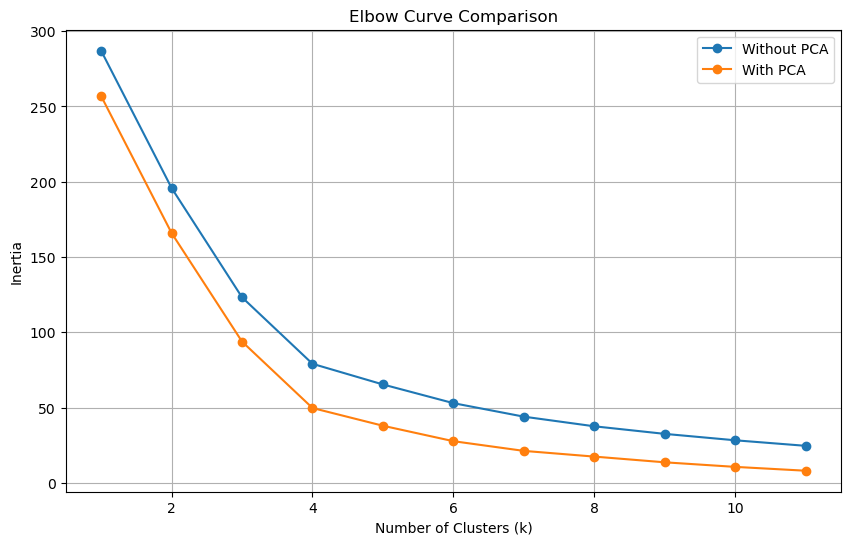

In [34]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Elbow curve without PCA
ax.plot(elbow_df['k'], elbow_df['inertia'], marker='o', label='Without PCA')

# Plot the Elbow curve with PCA
ax.plot(elbow_df_pca['k'], elbow_df_pca['inertia_pca'], marker='o', label='With PCA')

# Customize the plot appearance
ax.set_title('Elbow Curve Comparison')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.grid(True)
ax.legend()

# Show the composite plot
plt.show()


In [37]:
# Composite plot to contrast the clusters
import hvplot.pandas
import holoviews as hv

# Create a DataFrame with cryptocurrency names, PCA components (PC1 and PC2), and cluster labels for both cases
pca_plot_data_original = df_copy[['price_change_percentage_24h', 'price_change_percentage_7d', 'cluster']]
pca_plot_data_original['crypto_name'] = df_copy.index

pca_plot_data_pca = df_pca_copy[['PCA1', 'PCA2', 'cluster']]
pca_plot_data_pca['crypto_name'] = df_pca_copy.index

# Create scatter plots for clusters without and with PCA
scatter_original = pca_plot_data_original.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    cmap='viridis',
    size=8,
    hover_cols=["crypto_name"],
    title='Clusters without PCA'
)

scatter_pca = pca_plot_data_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="cluster",
    cmap='viridis',
    size=8,
    hover_cols=["crypto_name"],
    title='Clusters with PCA'
)

# Combine the two scatter plots into a composite layout
composite_layout = hv.Layout(scatter_original + scatter_pca)

# Display the composite plot
composite_layout


C:\Users\derek\AppData\Local\Temp\ipykernel_10552\3914113131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_plot_data_original['crypto_name'] = df_copy.index


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,crypto_name)
   .Scatter.II :Scatter   [PCA1]   (PCA2,cluster,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  PCA for dimensionality reduction has had a positive impact on the clustering results. It has improved the separation between clusters, reduced the dimensionality, and enhanced interpretability, all while maintaining the integrity of the clustering structure. This approach is particularly useful when dealing with high-dimensional data or when aiming to simplify complex datasets for clustering and analysis.